# **Analyze Semantic Change (Ngrams)**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from ngramprep.common.w2v_model import W2VModel
from analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from analyze.weat_time_series import compute_weat_over_years
from analyze.dimension_projection_time_series import compute_projection_over_years, compute_baseline_set
from analyze.pca_dimension_time_series import compute_pca_dimension_over_years
from analyze.semantic_drift import track_local_semantic_change, track_global_semantic_change, track_directional_drift
from analyze.average_relatedness_by_year import track_word_relatedness

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [2]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [3]:
year = 2010
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2010 = 0.5823
cos(Φ) of 'horse' and 'deer' in 2010 = 0.5173
cos(Φ) of 'horse' and 'ivy' in 2010 = 0.1762
cos(Φ) of 'horse' and 'atom' in 2010 = 0.1453


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [4]:
year = 2000
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y1990_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.7588
  cos(Φ) SD = 0.0667
  shared words: 29470

Similarity of 'horse' between models:
  cos(Φ) = 0.8472



### `mean_cosine_similarity_to_all` method

In [10]:
year = 1980
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')

print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1397


### `track_local_semantic_change` function

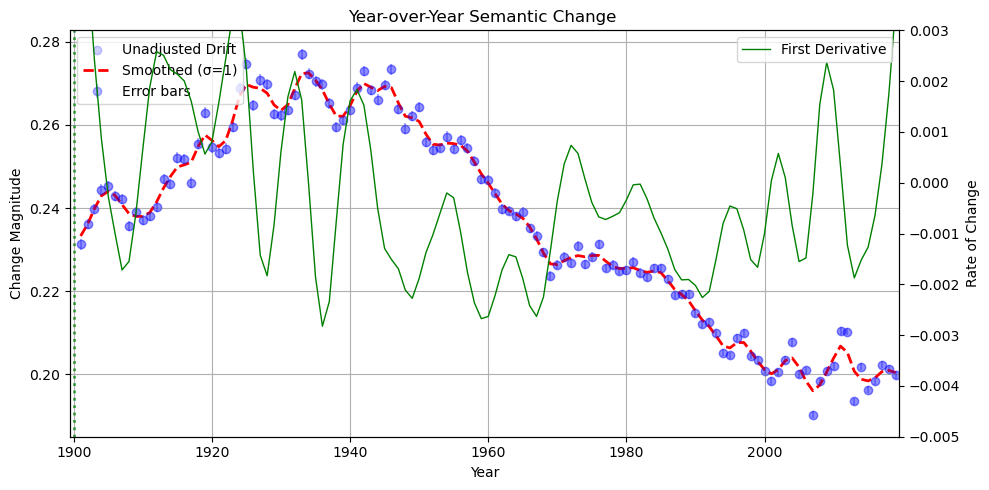

In [6]:
drift_scores = track_local_semantic_change(
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `track_global_semantic_change` function

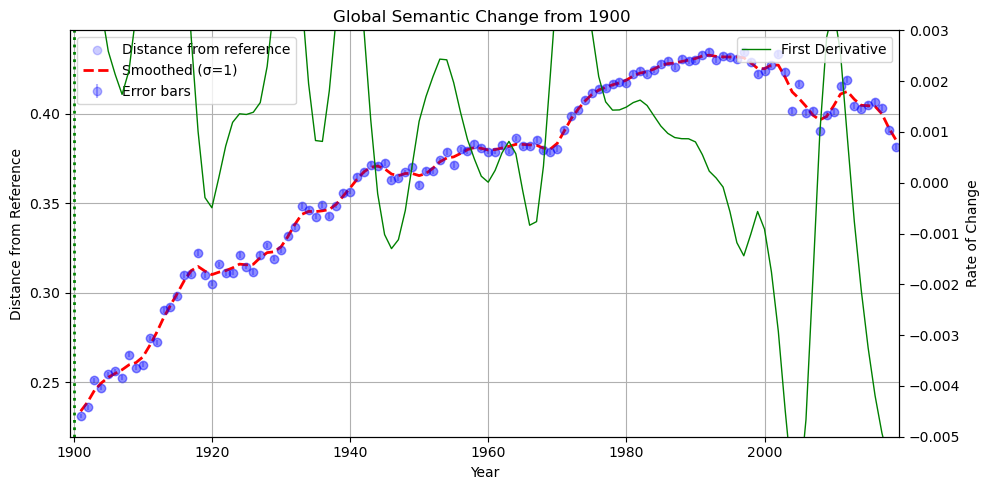

In [16]:
drift_scores = track_global_semantic_change(
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `track_word_relatedness` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

Computing mean cosine similarity for 1 words (Excluding: 0 words)


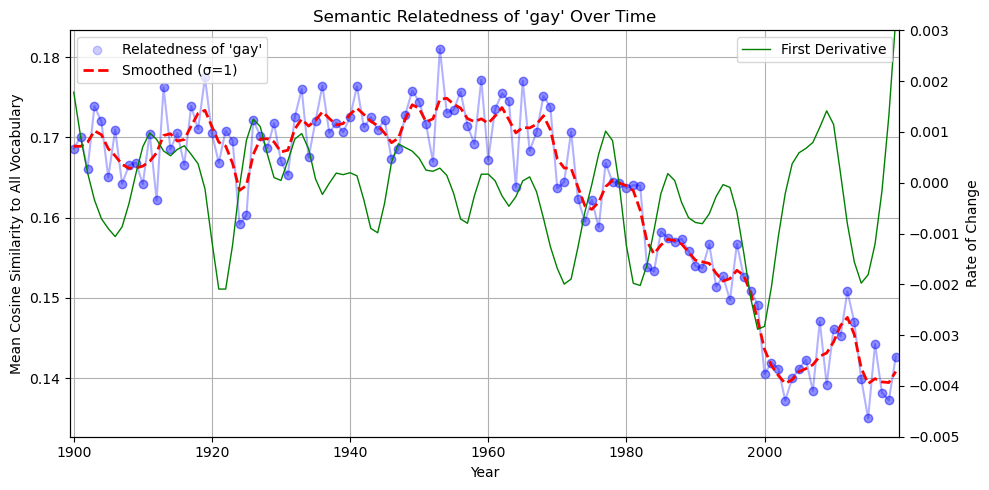

In [11]:
relatedness_scores = track_word_relatedness(
    word=['gay'],
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.


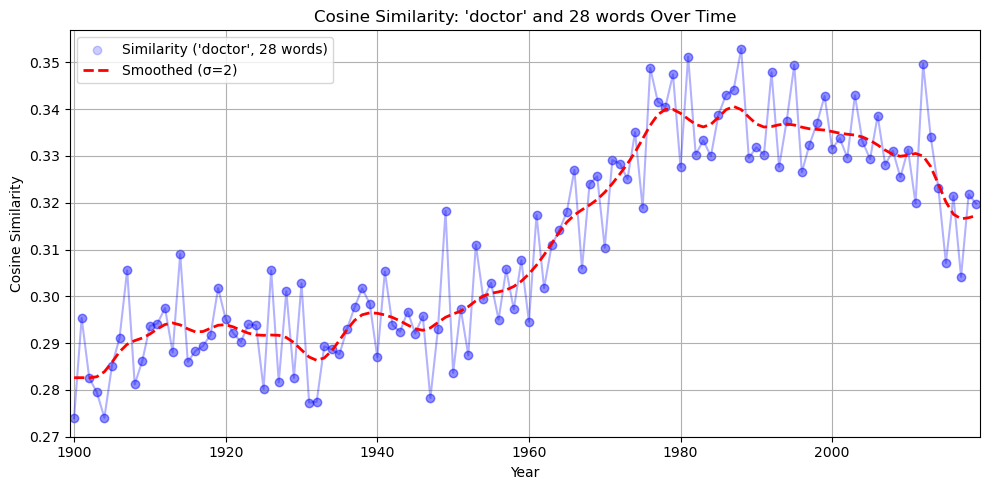

In [47]:
feminine = ['she', 'her', 'hers', 'herself', 'woman', 'women', 'girl', 'girls', 'mother', 'mothers', 'daughter', 'daughters', 'sister', 'sisters']
masculine = ['he', 'him', 'his', 'himself', 'man', 'men', 'boy', 'boys', 'father', 'fathers', 'son', 'sons', 'brother', 'brothers']
gender = feminine + masculine

sim_scores = cosine_similarity_over_years(
    word1=['doctor'],
    word2=gender,
    start_year=1900,
    end_year=2019,
    year_step=1,
    plot_derivative=False,
    model_dir=model_path,
    plot=1,
    smooth=True,
    sigma=2
)

### `track_directional_drift` function

Loading embeddings for word 'gay' across 120 years...


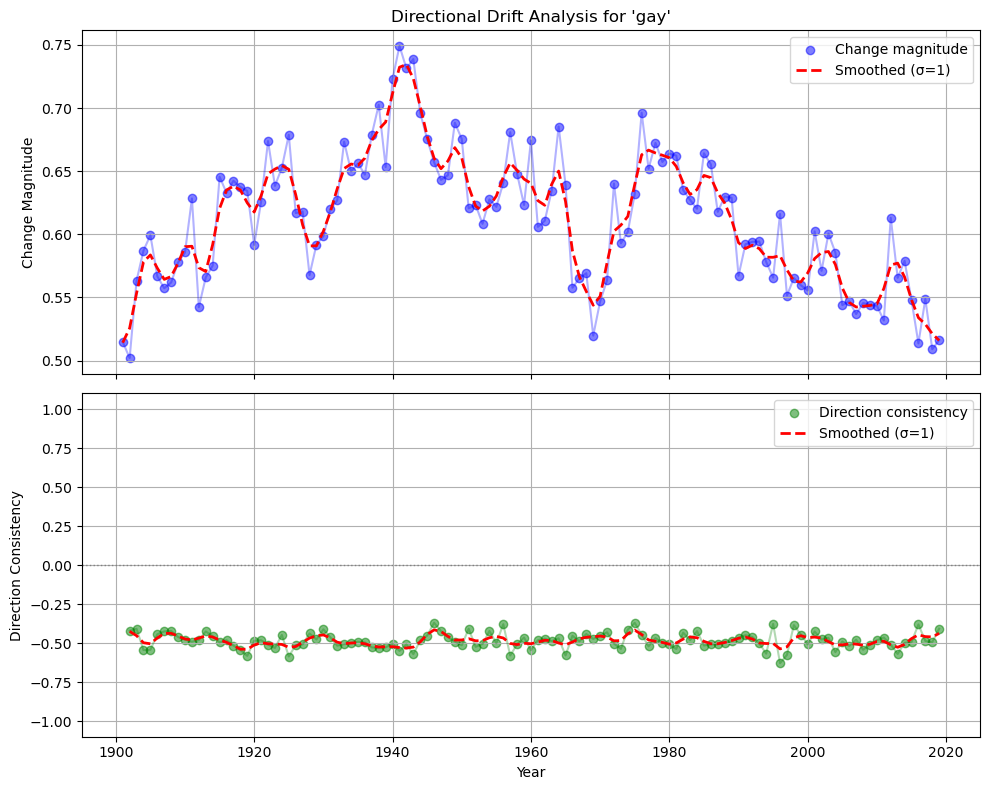

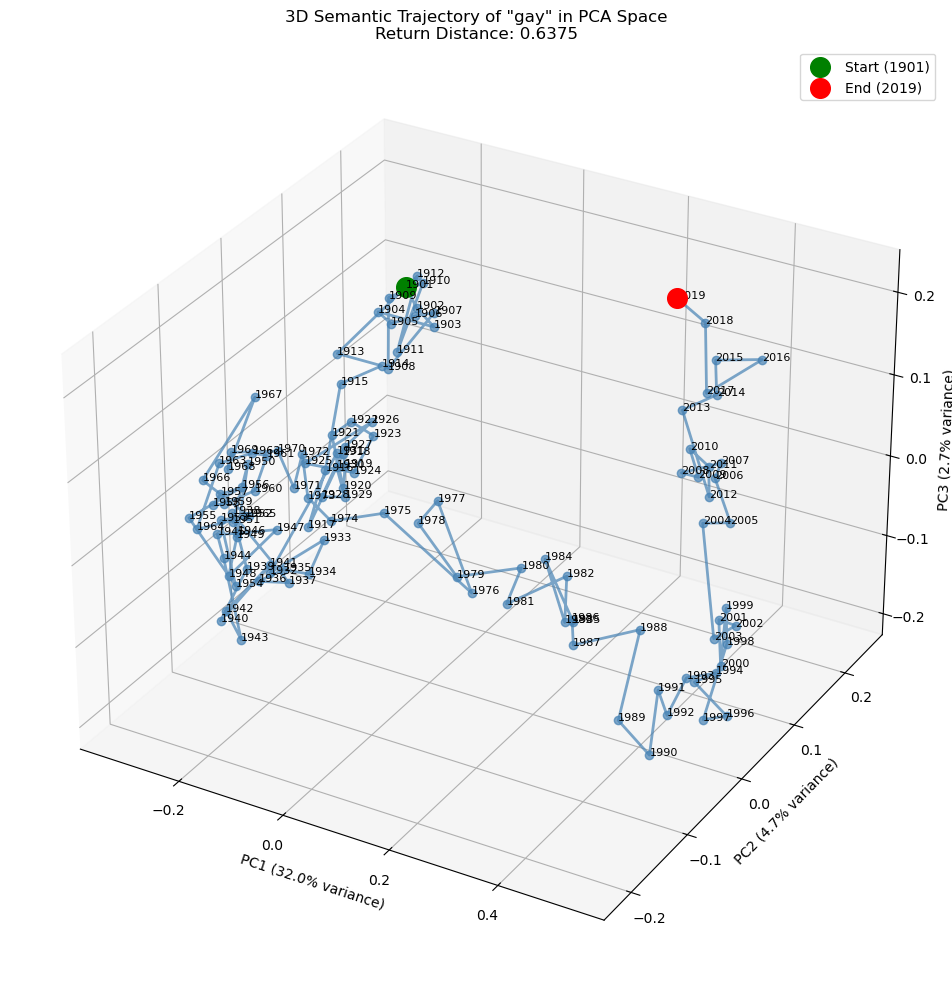

In [19]:
drift_scores = track_directional_drift(
    word='gay',
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=model_path,
    plot=True,
    smooth=True,
    sigma=1,
    plot_trajectory=True,
    trajectory_3d=True
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

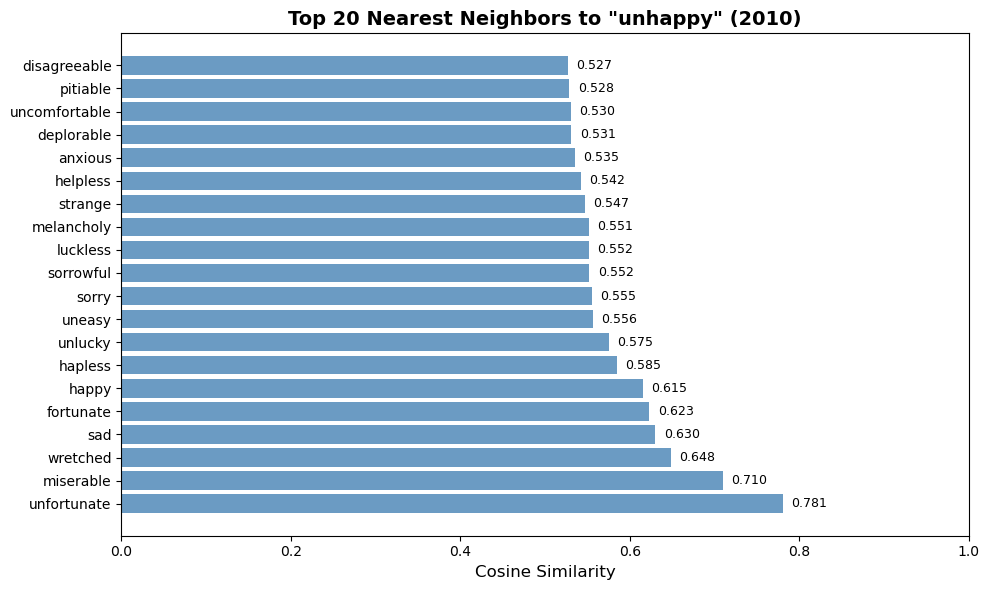

In [123]:
neighbors = plot_nearest_neighbors(
    word='unhappy',
    year=2010,
    model_dir=model_path,
    n=20
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [ ]:
model = W2VModel(f'{model_path}/w2v_y2000_wbnone_vs300_w004_mc001_sg1_e010.kv')

target1 = ["brad", "brendan", "geoffrey", "greg", "brett", "jay", "matthew", "neil", "todd", "allison", "anne", "carrie", "emily", "jill", "laurie", "kristen", "meredith", "sarah"]
target2 = ["darnell", "hakim", "jermaine", "kareem", "jamal", "leroy", "rasheed", "tremayne", "tyrone", "ebony", "kenya"]
attribute1 = ["joy", "love", "peace", "wonderful", "pleasure", "friend", "laughter", "happy"]
attribute2 = ["agony", "terrible", "horrible", "nasty", "evil", "war", "awful", "failure"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

⚠️ Warning: The following words are missing from the model and will be ignored: ['brendan', 'geoffrey', 'greg', 'brett', 'matthew', 'neil', 'todd', 'allison', 'anne', 'carrie', 'emily', 'jill', 'laurie', 'kristen', 'meredith', 'sarah', 'darnell', 'hakim', 'jermaine', 'kareem', 'jamal', 'leroy', 'rasheed', 'tremayne', 'tyrone', 'kenya']
WEAT effect size (Cohen's d) = 1.7263, p = 0.0000


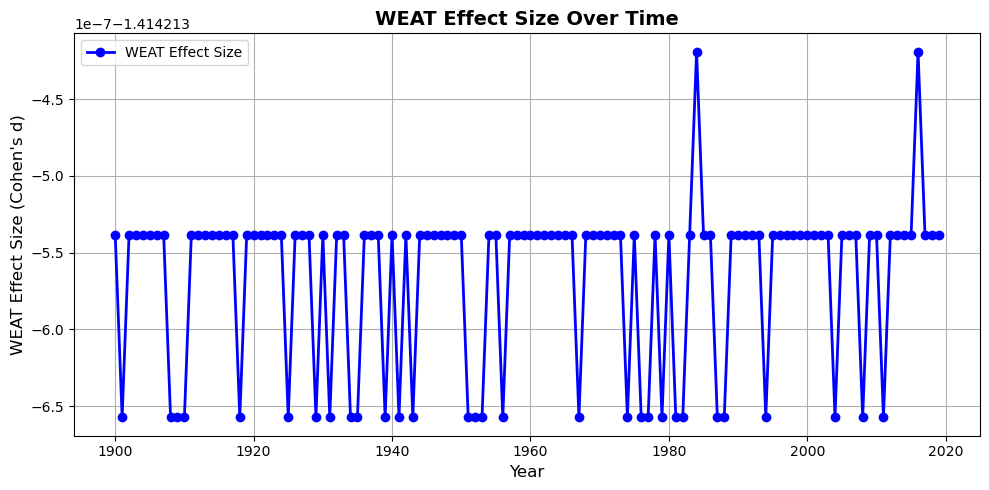

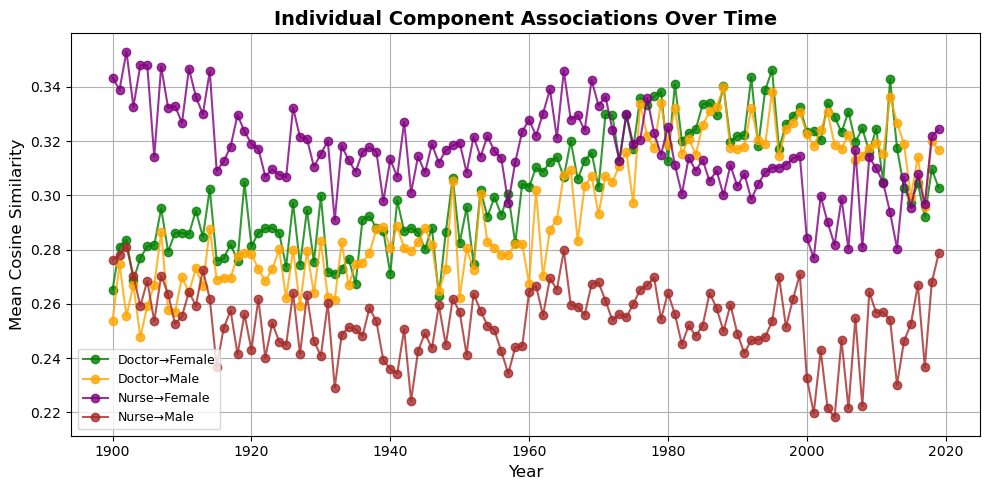

In [20]:
target1 = {'Doctor': ["doctor"]}
target2 = {'Nurse': ["nurse"]}
attribute1 = {'Female': ["female", "she", "her", "hers", "herself", "woman", "women", "girl", "girls", "mother", "mothers", "daughter", "daughters", "sister", "sisters"]}
attribute2 = {'Male': ["male", "he", "him", "his", "himself", "man", "men", "boy", "boys", "son", "sons", "brother", "brothers"]}

weat_scores = compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    year_step=1,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=False,
    sigma=1,
    return_std=False,
    return_associations=True,
    plot_associations=['Doctor→Male', 'Nurse→Female', 'Doctor→Female', 'Nurse→Male']
)

### `compute_meandiff_dimension` method

In [46]:
year = 1900
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')

gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

meandiff_result = model.compute_meandiff_dimension(
    token_contrasts=gender_contrasts
)

W2VModel.print_meandiff_summary(meandiff_result)
W2VModel.print_component_loadings(meandiff_result, title="COMPONENT LOADINGS")


════════════════════════════════════════════════════════════════════════════════════════════════════
MEAN-DIFFERENCE DIMENSION SUMMARY
════════════════════════════════════════════════════════════════════════════════════════════════════
Valid pairs:             14

Pair Loading Statistics:
────────────────────────────────────────────────────────────────────────────────────────────────────
Mean loading:                          0.5452
Std deviation:                         0.0871
Min loading:                           0.3721
Max loading:                           0.7119
Loading range:                         0.3397
Coeff. of variation:                   0.1598

────────────────────────────────────────────────────────────────────────────────────────────────────
Pair Coherence:          GOOD (coherent pairs)
────────────────────────────────────────────────────────────────────────────────────────────────────

All 14 pair loadings are positive by construction.
Loading range of 0.3721–0.7119

### `print_word_projections` method

In [47]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbdoc_freq_vs300_w004_mc001_sg1_e010.kv')

gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('female', 'male'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

test_words = [
    'she', 'he', 'woman', 'man', 'female', 'male', 'girl', 'boy',
    'mother', 'father', 'daughter', 'son', 'sister', 'brother',
    'queen', 'king', 'actress', 'actor', 'waitress', 'waiter',
    'surgeon', 'doctor', 'nurse', 'teacher', 'engineer', 'scientist', 
    'lawyer', 'leader', 'assistant', 'boss', 'secretary', 'parent',
    'spouse', 'partner', 'chair', 'server', 'firefighter', 'physicist',
]

meandiff_result = model.compute_meandiff_dimension(
    token_contrasts=gender_contrasts
)

projections = W2VModel.print_word_projections(model, meandiff_result['dimension'], test_words)


────────────────────────────────────────────────────────────────────────────────────────────────────
WORD PROJECTIONS ON DIMENSION
────────────────────────────────────────────────────────────────────────────────────────────────────
Word                           Projection                                           Visualization
────────────────────────────────────────────────────────────────────────────────────────────────────
  he                               0.2370                                             ███████
  king                             0.2315                                              ██████
  leader                           0.2057                                              ██████
  father                           0.2023                                              ██████
  physicist                        0.1985                                               █████
  man                              0.1732                                               █████
  so

### `compute_projection_over_years` function

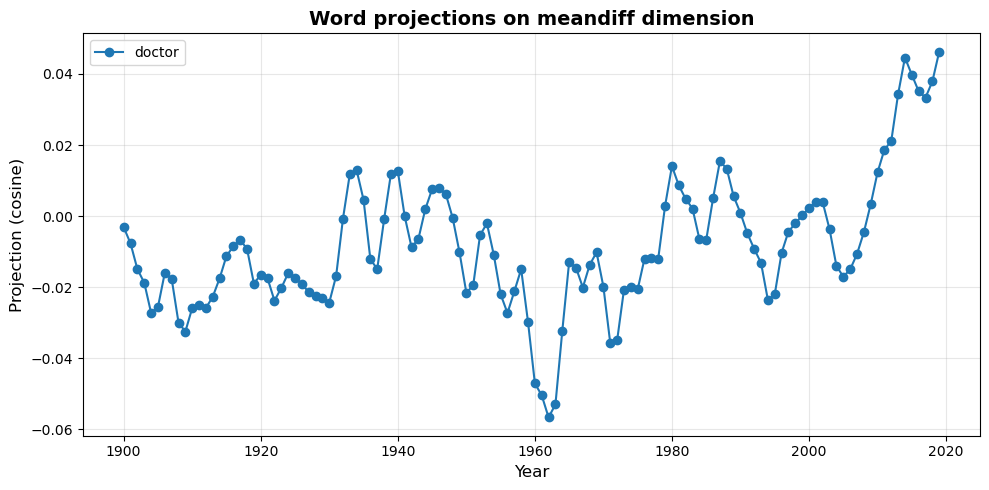

In [49]:
gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('female', 'male'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

result = compute_projection_over_years(
    model_dir=f"{model_path}",
    token_contrasts=gender_contrasts,
    test_words=['doctor'],
    start_year=1900,
    end_year=2019,
    year_step=1,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=True,
    sigma=1,
    verbose=False
)

Using shared vocabulary: 27754 words found across all models

Baseline word set selection:
  Total vocabulary:          27,754
  Neutral candidates:        25,817 (after anchor & pattern exclusion)
  Selected neutral words:    22,532 (passed stability thresholds)

  Selection thresholds:
    |mu| < 0.080  (mean projection)
    |beta| < 0.0100  (trend/year)
    sigma < 0.150  (temporal variability)
    n >= 5  (minimum years)

  Neutral word statistics:
    Mean |mu|:     0.0327
    Mean |beta|:   0.0004
    Mean sigma:    0.0386

  Over-time correlation:
    Mean:          0.5131
    Median:        0.5095
    Std:           0.1032
    Range:         [0.2630, 0.8024]

  Aggregation:               mean



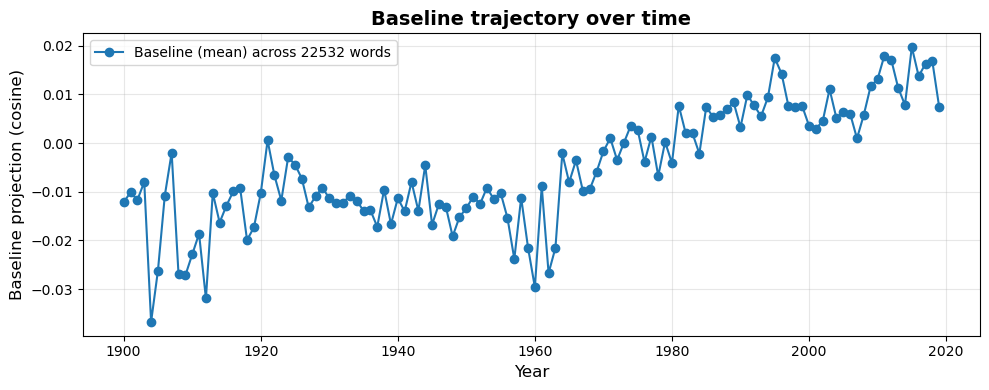

In [63]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

baseline_result = compute_baseline_set(
    model_dir=model_path,
    contrast_pairs=gender_contrasts,
    start_year=1900,
    end_year=2019,
    year_step=1,
    method='meandiff',
    exclusion_pattern=r"(man|men|woman|women|girl|boy|wife|husband|mother|father|son|daughter|she|he)",
    eps_mean=0.08,
    eps_trend=0.010,
    eps_sigma=0.15,
    min_years=5,
    agg="mean",
    corr_n_permutations=0,
    verbose=True,
    plot_baseline=True
)


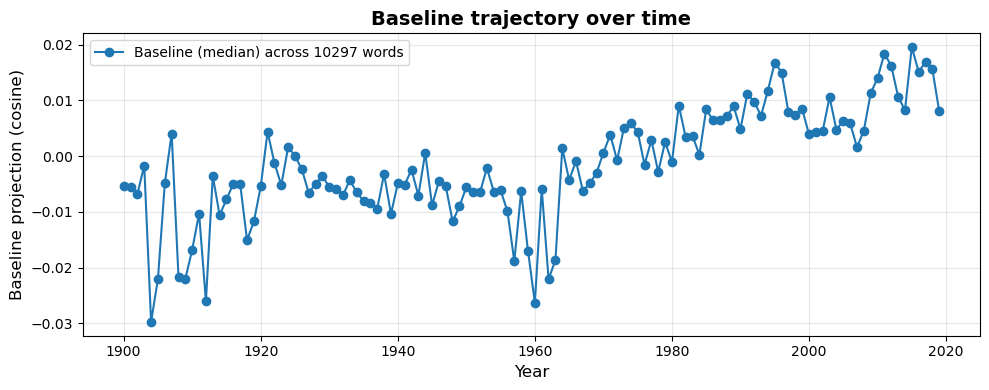

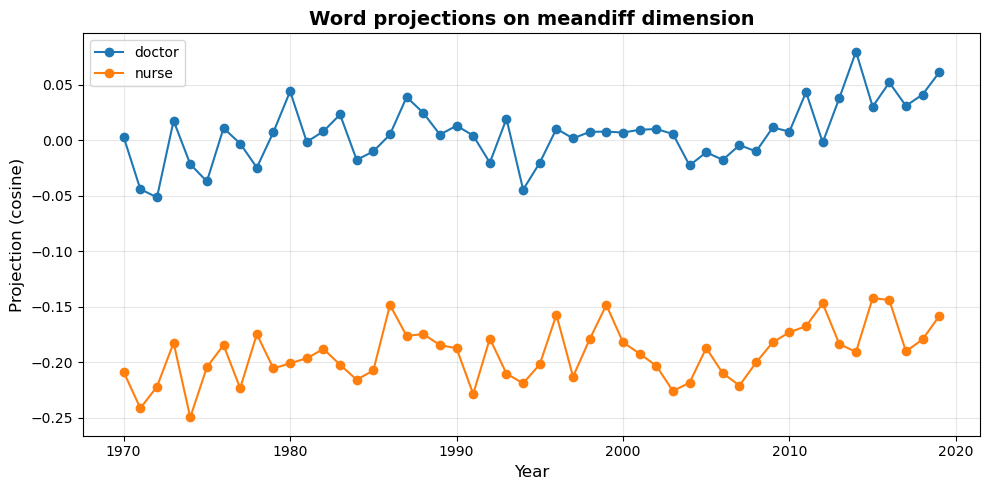

In [50]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

try:
    baseline_result
except NameError:
    baseline_result = compute_baseline_set(
        model_dir=model_path,
        contrast_pairs=gender_contrasts,
        start_year=1900,
        end_year=2019,
        year_step=1,
        method='meandiff',
        ensure_sign_positive=True,
        exclusion_pattern=r"(man|men|woman|women|girl|boy|wife|husband|mother|father|son|daughter|she|he)",
        min_years=5,
        agg="median",
        plot=False,
        corr_n_permutations=0,
    )

targets = ['doctor', 'nurse']

result = compute_projection_over_years(
    model_dir=model_path,
    token_contrasts=gender_contrasts,
    test_words=targets,
    start_year=1970,
    end_year=2019,
    year_step=1,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=True,
    sigma=2,
    verbose=False,
    baseline_result=baseline_result,
    plot_corrected_if_baseline=False,
    plot=True,
 )

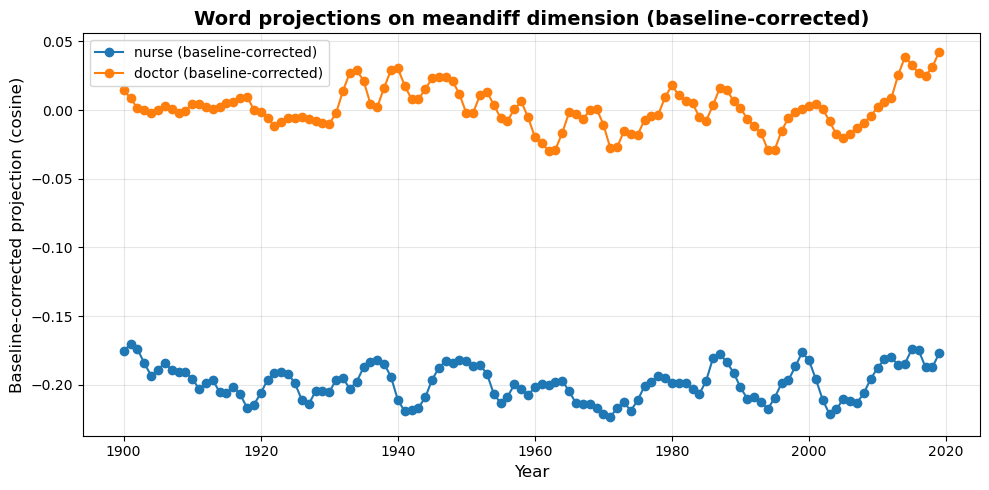

In [112]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

baseline_words = [
    'table', 'chair', 'window', 'door', 'wall', 'floor', 'roof',
    'tree', 'leaf', 'branch', 'root', 'flower', 'grass',
    'water', 'stone', 'rock', 'sand', 'soil', 'clay',
    'book', 'page', 'paper', 'pen', 'ink',
    'cup', 'plate', 'bowl', 'spoon', 'knife', 'fork',
    'bread', 'cheese', 'butter', 'salt', 'sugar',
    'road', 'path', 'bridge', 'gate', 'fence',
    'box', 'bag', 'basket', 'bottle', 'jar',
    'horse', 'cow', 'sheep', 'pig', 'chicken', 'dog', 'cat',
    'sun', 'moon', 'star', 'cloud', 'rain', 'wind',
    'river', 'lake', 'mountain', 'hill', 'valley',
    'wood', 'metal', 'iron', 'gold', 'silver',
    'wheel', 'rope', 'chain', 'nail', 'hammer'
]

try:
    baseline_result
except NameError:
    baseline_result = compute_baseline_set(
        model_dir=model_path,
        contrast_pairs=gender_contrasts,
        start_year=1900,
        end_year=2019,
        year_step=1,
        method='meandiff',
        ensure_sign_positive=True,
        exclusion_pattern=r"(man|men|woman|women|girl|boy|wife|husband|mother|father|son|daughter|she|he)",
        min_years=5,
        agg="median",
        plot=False,
        corr_n_permutations=0,
    )

targets = ['nurse', 'doctor']

result = compute_projection_over_years(
    model_dir=model_path,
    token_contrasts=gender_contrasts,
    test_words=targets,
    start_year=1900,
    end_year=2019,
    year_step=1,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=True,
    sigma=1,
    verbose=False,
    baseline_result=baseline_result,
    #baseline_words=baseline_words,
    plot_corrected_if_baseline=True,
    plot=True,
 )